distance =  0
mean_of_mean =  0.014761924333006484
Standard deviation =  1.0736501664738647
distance =  1
mean_of_mean =  -0.05059645772458663
Standard deviation =  1.123967865220051
distance =  2
mean_of_mean =  -0.08197787559526341
Standard deviation =  1.2251504718669763
distance =  3
mean_of_mean =  -0.1388464743920214
Standard deviation =  1.3832266047066648
distance =  4
mean_of_mean =  -0.1933386492596218
Standard deviation =  1.5774604767322264
distance =  5
mean_of_mean =  -0.24361248981112885
Standard deviation =  1.8005308159918847
distance =  6
mean_of_mean =  -0.27398034177301017
Standard deviation =  2.027894427356784
distance =  7
mean_of_mean =  -0.3305671136708065
Standard deviation =  2.283316962285737
[1.088412090806871, 1.0733714074954646, 1.143172596271713, 1.2443801303146433, 1.3841218274726046, 1.5569183261807558, 1.7539140855837738, 1.9527498486149306]
caluc_time =  2.148930072784424


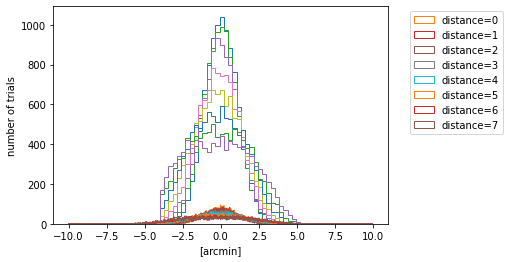

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time
N=10
#ni=[1.0,0.7,0.5,0.3,0.]
FWHM=8
dist_list=[]
sigma_list=[]
two_sigma_list=[]
mean_sigma_list=[]
hist_list=[]
step=10000
numbin=1000
start = time.time()

min=-10
max=10

ni=np.random.rand(step)
for d in range(0, 8):
    dist_list.append(d)
    print("distance = ", d)
    mean_list=[]
    for i in range(step):
        merge = []
        n1=int(N*ni[i])
        n2=N-n1
        a1=np.random.normal(
            loc   = d/2,
            scale = FWHM/2.35,
            size  = n1,
            )
        #print("a1= ", a1)
        a2=np.random.normal(
            loc   = -d/2,
            scale = FWHM/2.35,
            size  = n2,
            )
        #print("a2 ", a2)
        merge=np.append(a1,a2)
        #print(merge)
        mean=np.mean(merge)
        mean_list.append(mean)
        #print("n1 = ", n1)
        #print("n2 = ", n2)
        #print("mean = ", mean)
        #plt.hist(a1)
        #plt.hist(merge,bins=50,histtype="step",label="gaus1:gaus2 = {:.1f} : {:.1f}".format(ni[n], 1-ni[n]))
        #plt.xlabel("[arcmin]")
        #plt.ylabel("number of trials")
        #plt.legend(bbox_to_anchor=(1.05,0.9))
    #print("mean_list =", mean_list)
    plt.hist(mean_list, bins=50,histtype="step",range=(-4,10))
    mean_of_mean=np.mean(mean_list)
    print("mean_of_mean = ", mean_of_mean)

    plt.xlabel("[arcmin]")
    plt.ylabel("number of trials")


    #print("total mean_list =", mean_list)
    st_d=np.std(mean_list)
    sigma_list.append(st_d)
    two_sigma_list.append(st_d*2)
    mean_plus_sigma=mean_of_mean+st_d
    mean_sigma_list.append(mean_plus_sigma)
    print("Standard deviation = ", st_d)
    
    res=plt.hist(mean_list, bins=numbin,histtype="step",range=(min,max),label="distance=%d" %d)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    hist_list.append(res)
print(mean_sigma_list)

end = time.time()

print("caluc_time = ", end-start)

10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0


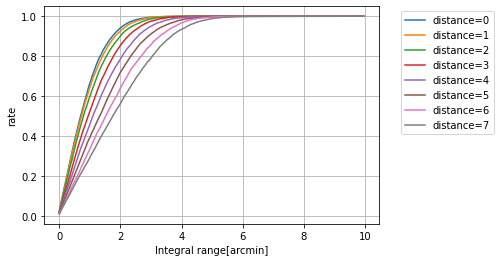

In [54]:
axis_list=hist_list[0][1]
counts_list=hist_list[0][0]

for a in range(0,8):
    b=0
    counts_list=hist_list[a][b]
    area0=counts_list[int(numbin/2)]
    
    d_list=[]
    area_list=[]

    for i in range (int((numbin/2)-1)):
        d_list.append(i*(max-min)/numbin)
        count0_p = counts_list[int(numbin/2)+i+1]
        count0_m = counts_list[int(numbin/2)-i-1]
        area0=area0+count0_p+count0_m
        area_list.append(area0)
        rate_list= [x/step for x in area_list]
        #print(area0)

    print(area0)
    plt.plot(d_list, rate_list ,label="distance=%d" %a)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.grid(True)
    plt.xlabel("Integral range[arcmin]")
    plt.ylabel("rate")

10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0


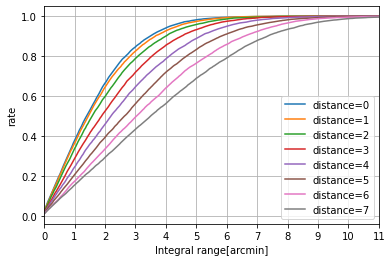

In [55]:


for a in range(0,8):
    b=0
    counts_list=hist_list[a][b]
    area0=counts_list[int(numbin/2)]
    
    d_list=[]
    area_list=[]

    for i in range (int((numbin/2)-1)):
        d_list.append(2*i*(max-min)/numbin)
        count0_p = counts_list[int(numbin/2)+i+1]
        count0_m = counts_list[int(numbin/2)-i-1]
        area0=area0+count0_p+count0_m
        area_list.append(area0)
        rate_list= [x/step for x in area_list]
        #print(area0)

    print(area0)
    plt.plot(d_list, rate_list ,label="distance=%d" %a,)
    plt.xlim(0,11)
    plt.xticks(np.arange(0, 12, step=1))
    plt.legend()
    plt.grid(True)
    plt.xlabel("Integral range[arcmin]")
    plt.ylabel("rate")
plt.savefig("randam_Percentage_00.png")